Processing disordered EFGs in Gehlenite
=======================================

Crystallographic techniques such as X-ray diffraction (XRD) often only provide us with an average topology of a material. However, materials can be disordered, with spatial deviations from the average structure such as disordered chemical occupancy of sites, disorded atomic positions and temporal deviations in the form of dynamics. Solid-state NMR can be an effective local probe of this disorder, revealing more local chemical environments than are present in the average topology \[[Florian 2013](http://dx.doi.org/10.1039/C3CE40982A)\]. These observed local chemical environments correspond to the range of local electronic environments within the full disordered structural model.

By using ab-initio predictions of the NMR properties of possible local environments, we can piece together the NMR spectrum of a disordered material and quantify the structural model in terms of deviations from average topology. This could be, for example, in terms of probabilities of site occupancies, probabilities of correlated bonding of particular sites or correlations of NMR properties with continuously disordered structural parameters, such as bond angles and strain parameters.

Gehlenite is a disordered aluminosilicate consisting of two types of aluminium site and one type of silicon site. We want to look at aluminium EFGs to quantify the amount of disorder in the material, in particular the degree of violation of the "Loewenstein" rule (avoidance of Al-O-Al linkages) and its structural effects. This is based on analysis performed in [Florian 2012](http://pubs.acs.org/doi/abs/10.1021/cm3016935).

This tutorial [is available as an IPython notebook](http://nbviewer.ipython.org/github/tfgg/magres-format/blob/master/notebooks/Processing%20disordered%20EFGs.ipynb), which you can download, modify and run locally.

Load the bits from the `magres` and other modules that we need:

In [1]:
from __future__ import print_function
import warnings
warnings.filterwarnings("ignore") 
%pylab inline

import os.path
from magres.utils import load_all_magres
from magres.atoms import MagresAtoms

Populating the interactive namespace from numpy and matplotlib


Randomly occupied structures
----------------------------

First, let's load all the structures with random T2 occupation into `orig_structures`.

You can download a `.zip` file with all the structures in [from here](http://tfgg.me/files/tutorials/gehlenite_efgs.zip), extract this somewhere and modify the `PATH` variable to point to the folder where you extracted it.

In [2]:
PATH = "../samples/gehlenite" # modify this

orig_structures = load_all_magres(os.path.join(PATH, 'orig'))
print("We have {} structures".format(len(orig_structures)))

We have 24 structures


Let's have a look at the data. The following code will plot a histogram of the aluminium $C_Q$s in all the structures.

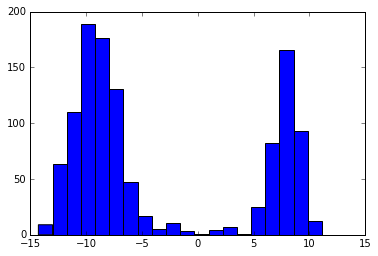

In [3]:
all_Cqs = []
for atoms in orig_structures:
    all_Cqs += atoms.species('Al').efg.Cq
hist(all_Cqs, bins=20)
show()

Let's bin our $C_Q$s by what type of aluminium site they're sitting on. Below is an image of a layer of the gehlenite structure.

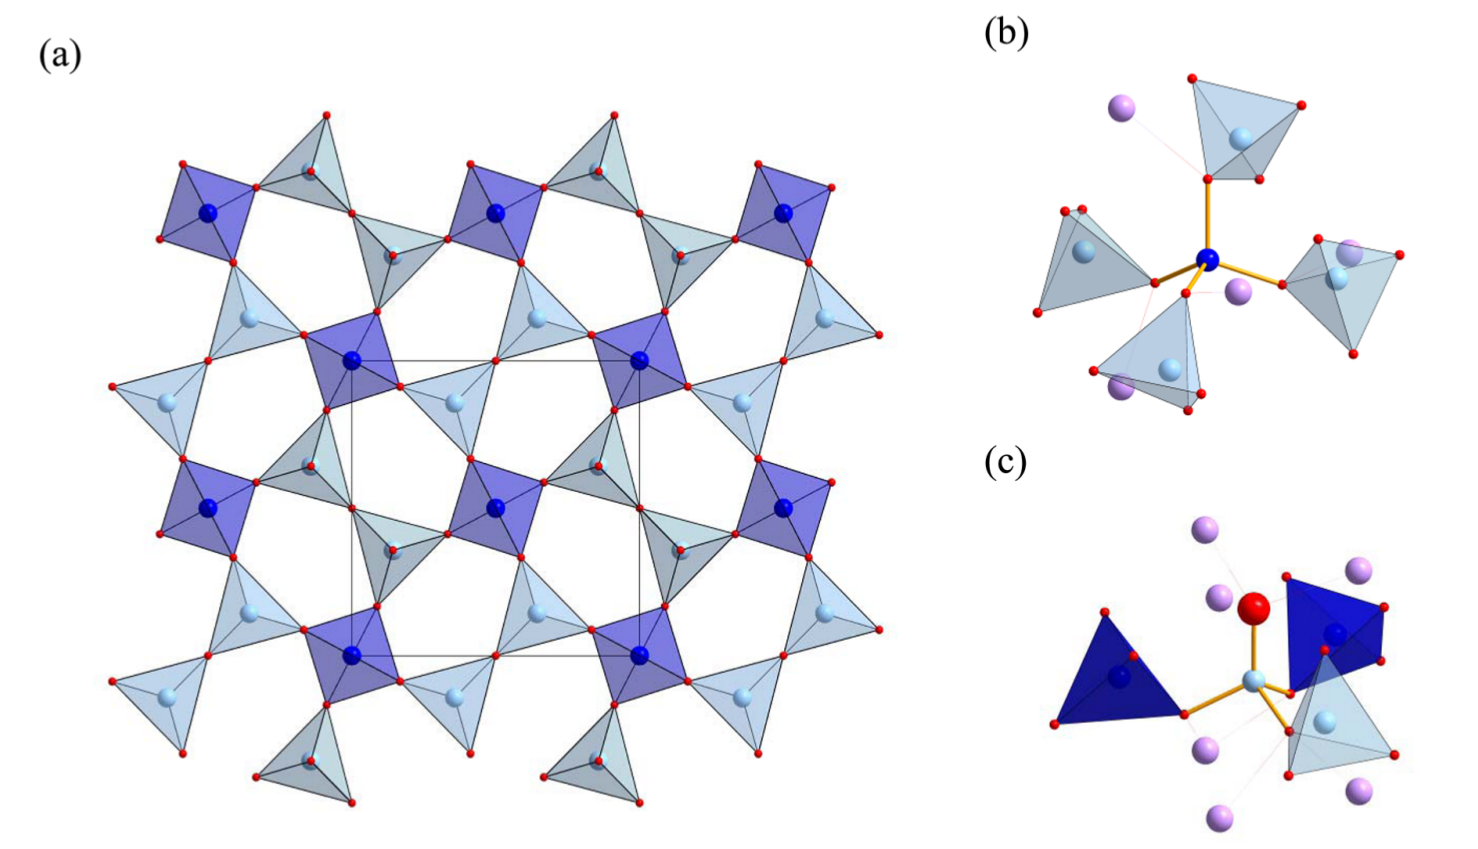

In [4]:
from IPython.core.display import Image 
Image(filename='gehlenite-sites.png', width=600, embed=True)

We have (b) T1 and (c) T2 aluminium sites. T1 sites have four Al/Si neighbours and T2 sites have three Al/Si neighbours. The number of silicon neighbours varies. T1 sites have between 0 and 4 silicon neighbours and T2 sites have 0 or 1 silicon neighbours, as one of those neighbours must be a T1 aluminium site. With this in mind, we'll make the following dictionary structure to hold all our $C_Q$s:

In [5]:
Al_Cqs1 = {'T1': {0: [], 1: [], 2: [], 3: [], 4: []},
          'T2': {0: [], 1: []},}

Next, we'll loop over all the structures and aluminium atoms within them. We'll then count the number of Al/Si neighbours and number of Si neighbours they each have, classifying their site in the process. We'll then put the aluminium atom's $C_Q$ into the correct bin.

In [6]:
def bin_sites(structures, bins):
    # Loop over all calculations
    for i, atoms in enumerate(structures):
        print(i, end=' ')
    
        for Al_atom in atoms.species('Al'):
            # Find all Al and Si neighbours within 3.5 angstroms of this atom
            neighbours = atoms.species('Al', 'Si').within(Al_atom, 3.5)

            # Classify the site
            if len(neighbours) == 5:
                site = 'T1'
            else:
                site = 'T2'

            # Count the number of Si neighbours
            num_Si = len(neighbours.species('Si'))

            bins[site][num_Si].append(abs(Al_atom.efg.Cq))

Al_Cqs1 = {'T1': {0: [], 1: [], 2: [], 3: [], 4: []},
          'T2': {0: [], 1: []},}
        
bin_sites(orig_structures, Al_Cqs1)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 

Let's calculate the means and standard deviations for each site bin.

In [7]:
def calc_stats(bins):
    stats = {'T1': {},
             'T2': {},}
    
    for site in bins:
        for num_si in bins[site]:
            print("Al%s, n_si=%d, Cq=%.2f +- %.2f" % (site, num_si, 
                           mean(bins[site][num_si]), std(bins[site][num_si])))

            stats[site][num_si] = {'mean': mean(bins[site][num_si]), 
                                             'stdev': std(bins[site][num_si])}

        
    return stats

orig_stats = calc_stats(Al_Cqs1)

AlT1, n_si=0, Cq=2.43 +- 0.84
AlT1, n_si=1, Cq=7.40 +- 1.31
AlT1, n_si=2, Cq=8.73 +- 1.20
AlT1, n_si=3, Cq=8.03 +- 0.96
AlT1, n_si=4, Cq=7.58 +- 0.79
AlT2, n_si=0, Cq=8.06 +- 1.55
AlT2, n_si=1, Cq=10.70 +- 1.33


Loewenstein-rule obeying structures
-----------------------------------

We can run the above analysis again against the Loewenstein-rule obeying structures, in which each T2 pair must be an aluminium and a silicon.

In [8]:
low_structures = load_all_magres(os.path.join(PATH, 'low'))
print("We have {} structures".format(len(low_structures)))

We have 25 structures


In [9]:
Al_Cqs2 = {'T1': {0: [], 1: [], 2: [], 3: [], 4: []},
           'T2': {1: []},}

In [10]:
bin_sites(low_structures, Al_Cqs2)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

In [11]:
low_stats = calc_stats(Al_Cqs2)

AlT1, n_si=0, Cq=1.01 +- 0.23
AlT1, n_si=1, Cq=5.62 +- 0.35
AlT1, n_si=2, Cq=7.26 +- 0.69
AlT1, n_si=3, Cq=7.05 +- 0.34
AlT1, n_si=4, Cq=7.93 +- 0.47
AlT2, n_si=1, Cq=10.63 +- 0.53


Showing a shift in almost all the $C_Q$s, indicating the effect that T2 Loewenstein-rule violations have on T1 site EFGs.